<a href="https://colab.research.google.com/github/AnnLivio/google_pandas/blob/main/candy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trick or Treat 🍬

## Halloween Candy Rankings
In 2017, Walt Hickey from FiveThirthyEight set out to find the Halloween candy most people prefer. To figure it out, he set up an experiment in which online voters could select their favorite candy from randomly generated matchups (for example, Twix or Snickers?).

After compiling about 269,000 votes from 8,371 different IP addresses, Walt calculated the win percentage for each type of candy and included several key attributes (for example, does it contain chocolate?) to find what makes them popular.

*(Source: FiveThirtyEight, License: Public Domain)*

+ Which candies have the highest win percentage? What do they have in common?
+ Are more expensive candies more popular? What about sugary candies?
+ Can you segment the candy into specific groups?
+ If you had to pick 3 candies to give out in Halloween, which would they be?

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_dict = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Simple_Projects/CandyDistributor/candy_data_dictionary.csv')
df_dict

,Field,Description
0,competitorname,The name of the candy
1,chocolate,Does it contain chocolate?
2,fruity,Is it fruit flavored?
3,caramel,Is there caramel in the candy?
4,peanutalmondy,"Does it contain peanuts, peanut butter or almo..."
5,nougat,Does it contain nougat?
6,crispedricewafer,"Does it contain crisped rice, wafers, or a coo..."
7,hard,Is it a hard candy?
8,bar,Is it a candy bar?
9,pluribus,Is it one of many candies in a bag or box?


In [ ]:
# Load data
path = "/content/drive/MyDrive/Colab Notebooks/Simple_Projects/CandyDistributor/candy-data.csv"
candy_df = pd.read_csv(path)
candy_df.head()


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [ ]:
candy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [ ]:
candy_df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [ ]:
candy_df.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [ ]:
col_ingredients = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer']

## Which candies have the highest win percentage? What do they have in common?

In [ ]:
candy_df.sort_values('winpercent', ascending=False).head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782


## Are more expensive candies more popular? What about sugary candies?

In [ ]:
candy_df.sort_values('pricepercent', ascending=False).head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
62,Nestle Smarties,1,0,0,0,0,0,0,0,1,0.267,0.976,37.887188
44,Nik L Nip,0,1,0,0,0,0,0,0,1,0.197,0.976,22.445341
55,Ring pop,0,1,0,0,0,0,1,0,0,0.732,0.965,35.290756
23,Hershey's Krackel,1,0,0,0,0,1,0,1,0,0.430,0.918,62.284481
40,Mr Good Bar,1,0,0,1,0,0,0,1,0,0.313,0.918,54.526451


In [ ]:
candy_df.sort_values('sugarpercent', ascending=False).head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
54,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550
38,Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.965,0.860,64.353340
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.941,0.220,55.103695
60,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140


## Can you segment the candy into specific groups?

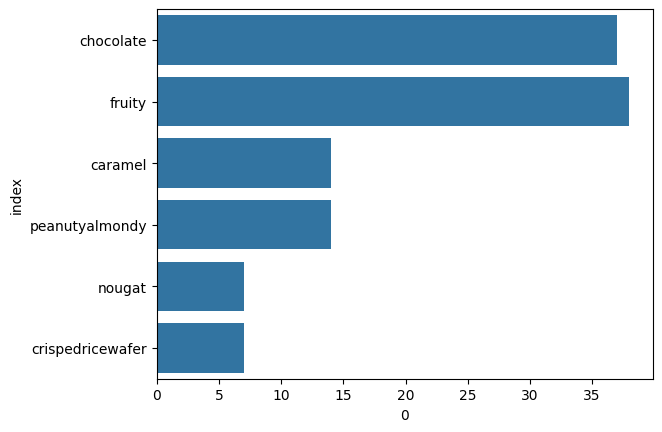

In [ ]:
popular_ingredient = candy_df[col_ingredients].sum().reset_index()
sns.barplot(y='index', x=0, data=popular_ingredient)
plt.show()

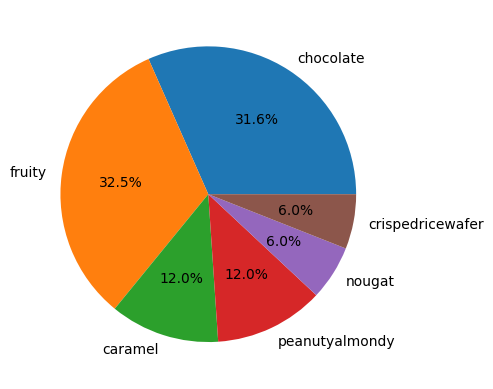

In [ ]:
plt.pie(popular_ingredient[0], labels=popular_ingredient['index'], autopct='%1.1f%%')
plt.show()

## If you had to pick 3 candies to give out in Halloween, which would they be?

In [ ]:
candy_df.hard.value_counts()

,count
hard,
0,70
1,15


In [ ]:
candy_df.bar.value_counts()

,count
bar,
0,64
1,21


array([[<Axes: title={'center': 'sugarpercent'}>,
        <Axes: title={'center': 'pricepercent'}>],
       [<Axes: title={'center': 'winpercent'}>, <Axes: >]], dtype=object)

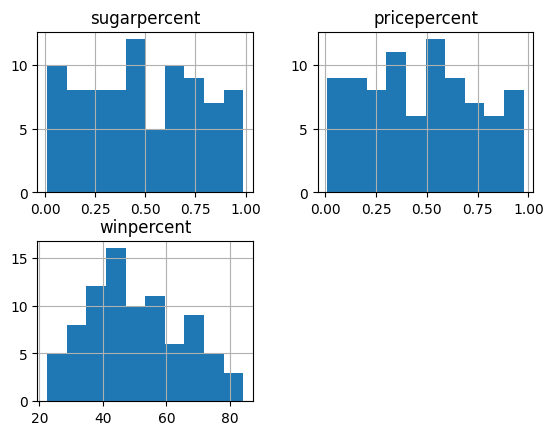

In [ ]:
candy_df[['sugarpercent',
       'pricepercent', 'winpercent']].hist()

In [ ]:
candy_df.select_dtypes(exclude='object').corr().style.background_gradient(cmap='coolwarm')


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
chocolate,1.000000,-0.741721,0.249875,0.377824,0.254892,0.341210,-0.344177,0.597421,-0.339675,0.104169,0.504675,0.636517
fruity,-0.741721,1.000000,-0.335485,-0.399280,-0.269367,-0.269367,0.390678,-0.515066,0.299725,-0.034393,-0.430969,-0.380938
caramel,0.249875,-0.335485,1.000000,0.059356,0.328493,0.213113,-0.122355,0.333960,-0.269585,0.221933,0.254327,0.213416
peanutyalmondy,0.377824,-0.399280,0.059356,1.000000,0.213113,-0.017646,-0.205557,0.260420,-0.206109,0.087889,0.309153,0.406192
nougat,0.254892,-0.269367,0.328493,0.213113,1.000000,-0.089744,-0.138675,0.522976,-0.310339,0.123081,0.153196,0.199375
crispedricewafer,0.341210,-0.269367,0.213113,-0.017646,-0.089744,1.000000,-0.138675,0.423751,-0.224693,0.069950,0.328265,0.324680
hard,-0.344177,0.390678,-0.122355,-0.205557,-0.138675,-0.138675,1.000000,-0.265165,0.014532,0.091810,-0.244365,-0.310382
bar,0.597421,-0.515066,0.333960,0.260420,0.522976,0.423751,-0.265165,1.000000,-0.593409,0.099985,0.518407,0.429929
pluribus,-0.339675,0.299725,-0.269585,-0.206109,-0.310339,-0.224693,0.014532,-0.593409,1.000000,0.045523,-0.220794,-0.247448
sugarpercent,0.104169,-0.034393,0.221933,0.087889,0.123081,0.069950,0.091810,0.099985,0.045523,1.000000,0.329706,0.229151
